## Part 1: House Price Prediction

**Goal:** Predict whether the house price is above or below median value, using Zillow’s Home Value Prediction Kaggle competition data

### Data Processing and EDA

In [53]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras.layers import Flatten, Conv2D, MaxPooling2D

In [2]:
df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [3]:
# Convert it to an array by accessing its values
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [4]:
# Split the dataset
X = dataset[:,0:10]
Y = dataset[:,10]

#### Data normalization
- Normalizing data to make the input features to be on the same order of magnitude to make training easier. 
- We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

#### Train and Test Split
- Set aside some parts of our dataset for a validation set and a test set. 
- Use the function train_test_split from scikit-learn to split.

In [9]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [10]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


### Build and Train Neural Network

Use the Sequential model: merely need to describe the layers above in sequence. 
Our neural network has 3 layers:
- Hidden layer 1: 30 neurons, ReLU activation
- Hidden layer 2: 30 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [12]:
# Specify the architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Find the best numbers for the model. Before starting training, we have to configure the model by telling:
- What algorithm to use to do the optimization (we'll use stochastic gradient descent)
- What loss function to use (for binary classification, we will use binary cross entropy)
- What other metrics to track apart from the loss function (we want to track accuracy as well)

In [27]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:
- what data we are training on, which is X_train and Y_train
- the size of our mini-batch
- how long we want to train it for (epochs)
- what our validation data is, so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [28]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 191us/step - loss: 0.2410 - accuracy: 0.9080 - val_loss: 0.3355 - val_accuracy: 0.8493
Epoch 2/100
1022/1022 [==============================] - 0s 59us/step - loss: 0.2406 - accuracy: 0.9100 - val_loss: 0.3356 - val_accuracy: 0.8493
Epoch 3/100
1022/1022 [==============================] - 0s 84us/step - loss: 0.2407 - accuracy: 0.9061 - val_loss: 0.3254 - val_accuracy: 0.8356
Epoch 4/100
1022/1022 [==============================] - 0s 92us/step - loss: 0.2399 - accuracy: 0.9051 - val_loss: 0.3277 - val_accuracy: 0.8402
Epoch 5/100
1022/1022 [==============================] - 0s 82us/step - loss: 0.2407 - accuracy: 0.9041 - val_loss: 0.3273 - val_accuracy: 0.8402
Epoch 6/100
1022/1022 [==============================] - 0s 94us/step - loss: 0.2394 - accuracy: 0.9080 - val_loss: 0.3329 - val_accuracy: 0.8539
Epoch 7/100
1022/1022 [==============================] - 0s 78us/step - loss

1022/1022 [==============================] - 0s 80us/step - loss: 0.2330 - accuracy: 0.9080 - val_loss: 0.3326 - val_accuracy: 0.8493
Epoch 57/100
1022/1022 [==============================] - 0s 70us/step - loss: 0.2340 - accuracy: 0.9090 - val_loss: 0.3269 - val_accuracy: 0.8584
Epoch 58/100
1022/1022 [==============================] - 0s 76us/step - loss: 0.2329 - accuracy: 0.9110 - val_loss: 0.3194 - val_accuracy: 0.8402
Epoch 59/100
1022/1022 [==============================] - 0s 61us/step - loss: 0.2336 - accuracy: 0.9129 - val_loss: 0.3250 - val_accuracy: 0.8539
Epoch 60/100
1022/1022 [==============================] - 0s 91us/step - loss: 0.2335 - accuracy: 0.9080 - val_loss: 0.3203 - val_accuracy: 0.8447
Epoch 61/100
1022/1022 [==============================] - 0s 77us/step - loss: 0.2331 - accuracy: 0.9090 - val_loss: 0.3211 - val_accuracy: 0.8447
Epoch 62/100
1022/1022 [==============================] - 0s 49us/step - loss: 0.2330 - accuracy: 0.9100 - val_loss: 0.3215 - val_a

In [29]:
# Evaluate the model on test data
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 46us/step


0.8858447670936584

## Visualization of Loss and Accuracy

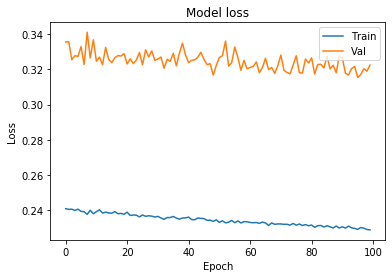

In [30]:
# Visualize the training loss and the validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

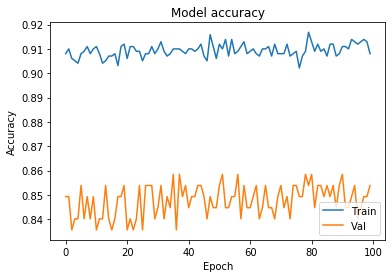

In [31]:
# Visualize the training accurarcy and the validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Add Regularization to Neural Network
We'll train a model which will overfit, which we call Model 2.

In [32]:
# Model 2
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4415 - accuracy: 0.8023 - val_loss: 0.4000 - val_accuracy: 0.8082
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3458 - accuracy: 0.8650 - val_loss: 0.3640 - val_accuracy: 0.8356
Epoch 3/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2945 - accuracy: 0.8757 - val_loss: 0.3453 - val_accuracy: 0.8402
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2889 - accuracy: 0.8777 - val_loss: 0.3121 - val_accuracy: 0.8584
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2687 - accuracy: 0.8982 - val_loss: 0.3062 - val_accuracy: 0.8584
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2598 - accuracy: 0.9031 - val_loss: 0.2921 - val_accuracy: 0.8447
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2671

Epoch 57/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1563 - accuracy: 0.9364 - val_loss: 0.3768 - val_accuracy: 0.8539
Epoch 58/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1584 - accuracy: 0.9325 - val_loss: 0.4039 - val_accuracy: 0.8767
Epoch 59/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1476 - accuracy: 0.9384 - val_loss: 0.4092 - val_accuracy: 0.8630
Epoch 60/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1361 - accuracy: 0.9393 - val_loss: 0.3542 - val_accuracy: 0.8676
Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1445 - accuracy: 0.9432 - val_loss: 0.3055 - val_accuracy: 0.8584
Epoch 62/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1425 - accuracy: 0.9384 - val_loss: 0.4766 - val_accuracy: 0.8539
Epoch 63/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1550 - accuracy: 0.9325 - val_loss: 0.3739 -

Same visualization to see what overfitting looks like in terms of the loss and accuracy

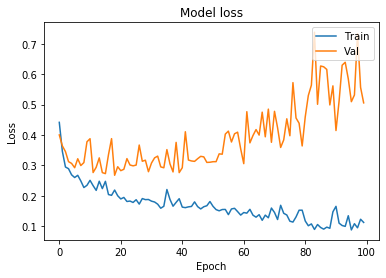

In [34]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

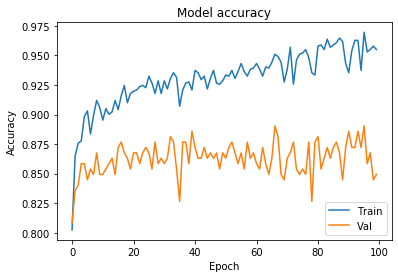

In [35]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

To address the overfitting in Model 2, we'll incorporate L2 regularization and dropout in our 3rd model here (Model 3).

In [36]:
# Model 3
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), 
          input_shape=(10,)), Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [37]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 14.2275 - accuracy: 0.6370 - val_loss: 3.9082 - val_accuracy: 0.8356
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.6520 - accuracy: 0.8523 - val_loss: 0.7309 - val_accuracy: 0.8311
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5620 - accuracy: 0.8689 - val_loss: 0.5398 - val_accuracy: 0.8402
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5014 - accuracy: 0.8826 - val_loss: 0.5601 - val_accuracy: 0.8356
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4824 - accuracy: 0.8845 - val_loss: 0.5021 - val_accuracy: 0.8265
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5070 - accuracy: 0.8659 - val_loss: 0.5160 - val_accuracy: 0.8219
Epoch 7/100
1022/1022 [==============================] - 3s 2ms/step - loss: 0.477

Epoch 57/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4191 - accuracy: 0.8933 - val_loss: 0.4802 - val_accuracy: 0.8402
Epoch 58/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4235 - accuracy: 0.8982 - val_loss: 0.4807 - val_accuracy: 0.8402
Epoch 59/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4152 - accuracy: 0.8933 - val_loss: 0.4815 - val_accuracy: 0.8402
Epoch 60/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4316 - accuracy: 0.8894 - val_loss: 0.5061 - val_accuracy: 0.8447
Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4158 - accuracy: 0.8973 - val_loss: 0.4870 - val_accuracy: 0.8493
Epoch 62/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4284 - accuracy: 0.8953 - val_loss: 0.4658 - val_accuracy: 0.8356
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4025 - accuracy: 0.9080 - val_loss: 0.5190 -

You'll notice that the loss is a lot higher at the start, and that's because we've changed our loss function.
To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting

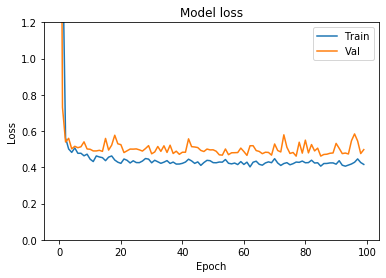

In [38]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

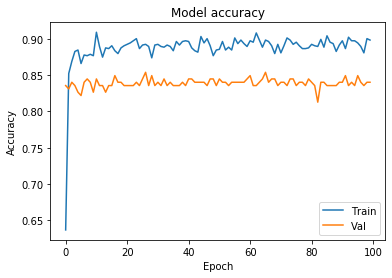

In [40]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

As compared to Model 2, there's less overfitting!

## Part 2: Image Recognition

**Goal:** Create Convolutional Neural Network to predict what is contained within the image.

### Data Processing and EDA
We will first have to download our dataset, CIFAR-10. The details of the dataset are as follows:
- Images to be recognized: Tiny images of 32 * 32 pixels
- Labels: 10 possible labels (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck)
- Dataset size: 60000 images, split into 50000 for training and 10000 for testing

In [41]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 165s 1us/step


In [43]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


Take a look at an individual image. If we print out the first image of our training dataset (x_train[0]):

In [44]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


Check the image as an image rather than a series of pixel value numbers, use a function from matplotlib:

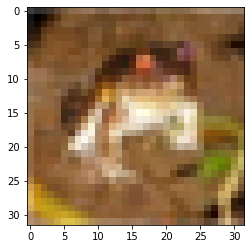

In [45]:
img = plt.imshow(x_train[0])

In [46]:
print('The label is:', y_train[0])

The label is: [6]


Explore 1 more image, the 2nd image (with index 1 instead of 0) in the training dataset:

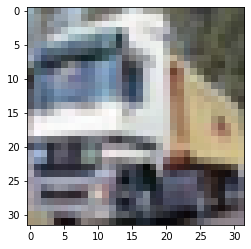

In [47]:
img = plt.imshow(x_train[1])

In [48]:
print('The label is:', y_train[1])

The label is: [9]


What we want is the probability of each of the 10 different classes. 
For that, we need 10 output neurons in our neural network. Since we have 10 output neurons, our labels must match this as well.
- Convert the label into a set of 10 numbers where each number represents if the image belongs to that class or not. 
- If an image belongs to the first class, the first number of this set will be a 1 and all other numbers in this set will be a 0. 

To convert our labels to our one-hot encoding, we use a function in Keras:

In [50]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [51]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


A common step we do is to let the values to be between 0 and 1, which will aid in the training of our neural network. 

Since our pixel values already take the values between 0 and 255, we simply divide by 255.

In [52]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

## Build and Train CNN

### Define architecture (template) 
- Conv Layer (Filter size 3x3, Depth 32)
- Conv Layer (Filter size 3x3, Depth 32)
- Max Pool Layer (Filter size 2x2)
- Dropout Layer (Prob of dropout 0.25)
- Conv Layer (Filter size 3x3, Depth 64)
- Conv Layer (Filter size 3x3, Depth 64)
- Max Pool Layer (Filter size 2x2)
- Dropout Layer (Prob of dropout 0.25)
- FC Layer (512 neurons)
- Dropout Layer (Prob of dropout 0.5)
- FC Layer, Softmax (10 neurons)

Add layer by layer to the model

In [54]:
model = Sequential() # empty model

Add first layer:
- The 1st number 32 refers to the depth. 
- The next pair of numbers (3,3) refer to the filter width and size.
- Specify activation which is 'relu' and padding which is 'same'. Notice that we did not specify stride. This is because stride=1 is a default setting, and unless we want to change setting, we need not specify it.
- Specify an input size for our first layer

In [55]:
# Add 1st layer
model.add(Conv2D(32, (3, 3), activation='relu', 
                 padding='same', input_shape=(32,32,3)))
# Add 2nd layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

The next layer is a max pooling layer with pool size 2 x 2 and stride 2 (in both dimensions). 
The default for a max pooling layer stride is the pool size, so we don't have to specify the stride:

In [56]:
model.add(MaxPooling2D(pool_size=(2, 2)))

Lastly, we add a dropout layer with probability 0.25 of dropout so as to prevent overfitting:

In [57]:
model.add(Dropout(0.25))

And there we have our first 4 layers in code. The next 4 layers look really similar (except the depth of the conv layer is 64 instead of 32):

In [58]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

Lastly, we have to code in our fully connected layer. 
However, at this point, our neurons are spatially arranged in a cube-like format rather than in just one row. To make this cube-like format of neurons into one row, we have to first flatten it by adding a Flatten layer:

In [59]:
model.add(Flatten())

In [60]:
# We have a dense (FC) layer of 512 neurons with Relu activation:
model.add(Dense(512, activation='relu'))
# Add another dropout of probability 0.5:
model.add(Dropout(0.5))
# Lastly, we have a dense (FC) layer with 10 neurons & softmax activation
model.add(Dense(10, activation='softmax'))

And we're done with specifying our architecture! 
Check a summary of the full architecture:

In [61]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

Then fill in the best numbers after we've specified our architecture. We'll compile the model with our settings below.
- The loss function we use is called categorical cross entropy, which is applicable for a classification problem of many classes. 
- The optimizer we use here is Adam. We haven't gone through the intuition of Adam yet, but know that Adam is simply a type of stochastic gradient descent (with a few modifications) so that it trains better.
- Lastly, we want to track the accuracy of our model.

In [62]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Train our model with batch size 32 and 20 epochs. 

We use the setting validation_split=0.2 instead of validation_data. With this shortcut, we did not need to split our dataset into a train and validation set at the start! Instead, we simply specify how much of our dataset will be used as a validation set. 

In this case, 20% of our dataset is used as a validation set. This will take a while on a CPU.

In [63]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 267s 7ms/step - loss: 1.5780 - accuracy: 0.4239 - val_loss: 1.2101 - val_accuracy: 0.5783
Epoch 2/20
40000/40000 [==============================] - 263s 7ms/step - loss: 1.1607 - accuracy: 0.5861 - val_loss: 0.9786 - val_accuracy: 0.6543
Epoch 3/20
40000/40000 [==============================] - 252s 6ms/step - loss: 1.0023 - accuracy: 0.6437 - val_loss: 0.8875 - val_accuracy: 0.6871
Epoch 4/20
40000/40000 [==============================] - 241s 6ms/step - loss: 0.9034 - accuracy: 0.6815 - val_loss: 0.8037 - val_accuracy: 0.7208
Epoch 5/20
40000/40000 [==============================] - 260s 7ms/step - loss: 0.8258 - accuracy: 0.7106 - val_loss: 0.8094 - val_accuracy: 0.7230
Epoch 6/20
40000/40000 [==============================] - 285s 7ms/step - loss: 0.7665 - accuracy: 0.7293 - val_loss: 0.7626 - val_accuracy: 0.7361
Epoch 7/20
40000/40000 [==============================] - 262s

#### Visualize the loss and accuracy

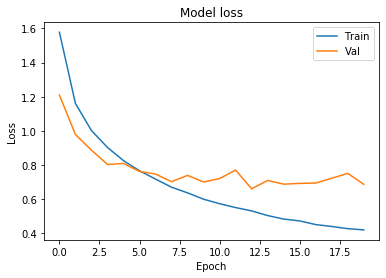

In [64]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

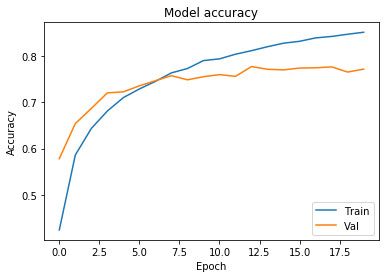

In [66]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [67]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 11s 1ms/step


0.7664999961853027

In [68]:
# Save model in a file format of HDF5 (with the extension .h5):
model.save('my_cifar10_model.h5')

## Test with own image

In [69]:
# Read JPEG file as an array of pixel values
my_image = plt.imread("cat.jpg")

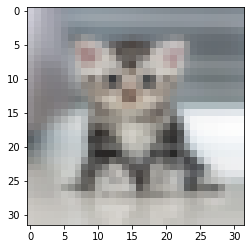

In [70]:
# Resize the cat image to fit it into our model (input size of 32 32 3)
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))
img = plt.imshow(my_image_resized)

In [71]:
# Check the output with own cat image
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))
probabilities

array([[6.30424938e-06, 2.73335967e-08, 4.28606989e-03, 3.24721411e-02,
        1.24156047e-02, 1.16018735e-01, 3.67144160e-02, 7.97724664e-01,
        3.61691869e-04, 3.84180481e-07]], dtype=float32)

In [72]:
number_to_class = ['airplane', 'automobile', 'bird', 
                   'cat', 'deer', 'dog', 'frog', 
                   'horse', 'ship', 'truck']

index = np.argsort(probabilities[0,:])

print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("2nd most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("3rd most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("4th most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("5th most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: horse -- Probability: 0.79772466
2nd most likely class: dog -- Probability: 0.116018735
3rd most likely class: frog -- Probability: 0.036714416
4th most likely class: cat -- Probability: 0.03247214
5th most likely class: deer -- Probability: 0.012415605


The model has accurately predicted that this is indeed an image of a cat. Now, this isn't the best model we have, and accuracy has been quite low, so don't expect too much out of it.